# Austin Real Estate Investment

### Where And Why To Buy

###### By Keith B, Vib Y, Karol C, and Aidin H

Our intent was to do an in-depth investigation of the housing market in Austin and study market-related variables to find which zip code would be most profitable to purchase a home in. 

The variables we looked at were: 

* House price by zip
* Household income by zip
* Current construction by zip
* Rate of change of construction by zip
* School ratings in each zip
* Types of businesses in zip



For information about housing prices and mortgage rates, we used: 

<img src="https://d360wc4uc6n3i9.cloudfront.net/assets/images/logos/v2/quandl-word-mark-fb41d14c7a394be8118897fb977de828.svg"  width="200" height="200">
<img src="http://zillow.mediaroom.com/image/ForScreen_RGB_ZillowLogo_Blue-Square-Horizontal-medium.jpg"  width="200" height="200">



To get the information about household income, we used the 2011 through 2016 American Community Surveys done by the US Census Bureau with some data cleaning help from their American FactFinder search.
<img src="https://lmi.workforcegps.org/-/media/Communities/lmi/Images/Icons-and-Logos/CB-AFF-Logo.ashx?h=118&la=en&w=335"  width="200" height="200">


For information about past and current construction projects in the city, we used 
<img src="https://data.austintexas.gov/api/assets/CFBD7709-F5FF-4A82-B530-A5B892DE7BE4/?/data-austintexas-gov.png"  width="200" height="200">

For school ratings, we used the GreatSchools.Org API.
<img src="https://www.greatschools.org/gk/wp-content/uploads/2016/07/GreatSchoolsLogo-social.png"  width="200" height="200">


For local business information, we accessed the Google Places API.
<img src="https://img.talkandroid.com/uploads/2015/07/google_maps_logo-450x450.png"  width="200" height="200">

## Python packages we used: 
### Data / Numerical Computaton
* Numpy
* Pandas

### Visualization
* Matplotlib
* Seaborn
* Folium
* ArcGIS

### Modeling
* Scikit-learn
* Tensorflow
* Kera

### MICS
* Selenium
* Subprocess

## Preprocessing: 
After finding our data sources, our next step was to clean all of the data and merge it into one giant dataframe/csv file. From that file, we were able to do our analysis. 

* Detectin missing/nan values
* Nan removal
* Gap filling
* Interpolation
* Reframing data


## Choropleth: 



In [54]:
import pandas as pd
import numpy as np
import os, sys, inspect, time
import folium
import subprocess
from folium.plugins import HeatMap
from sklearn import preprocessing
from selenium import webdriver
from selenium.webdriver.chrome.options import Options


# add parent dir to system dir
currdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(currdir)
sys.path.insert(0, rootdir)

from src.utils import get_temporal_data, get_spatial_data

# read main real state df
ffname_realestate = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
realestate_df = pd.read_csv(ffname_realestate)

In [55]:
# set indicator to plot
column_to_choroplethmap = "Home Value Index"

year = 2016
month = 12

df = get_spatial_data(year, realestate_df)
df = df.loc[df["Month"] == month, :]
df = df[["Zip Code", column_to_choroplethmap]]
df.reset_index(inplace=True)
df.drop(["index"], inplace=True, axis=1)
df["Zip Code"] = df["Zip Code"].astype(str)
df.dropna(inplace=True)
df.head()

,Zip Code,Home Value Index
0,78701,366600.0
1,78702,375200.0
2,78703,741800.0
3,78704,472100.0
4,78705,249600.0


In [56]:
# set choropleth map params
location = [30.3100, -97.8]
# set fill color
fill_color = "BuPu"
# set zoom in start level
zoom_start = 11
name = column_to_choroplethmap
max_val = df[column_to_choroplethmap].max()
min_val = df[column_to_choroplethmap].min()
threshold_scale = np.linspace(min_val, max_val, 6).tolist()


# create map
m = folium.Map(location, zoom_start=zoom_start)
ffname = os.path.join(rootdir, "data", "ext", "austin-zipcode-boundaries.geojson")
# create choropleth map
m.choropleth(
    geo_data=ffname,
    data=df,
    columns=["Zip Code", column_to_choroplethmap],
    key_on="feature.properties.zipcode",
    fill_color=fill_color)
m

## House Value vs Construction Dynamics: 
| [![HouseHomeValueIndex](../reports/figures/choroplethmap-home-value-index-2016-12.png)]()  | [![NewConstructions](../reports/figures/choroplethmap-total_newconstructions-2016-12.png)]() | [![TotalNewConstructionsCost](../reports/figures/choroplethmap-totalcost_newconstructions-2016-12.png)]() |
|:---:|:---:|:---:|
| House Home Value Index | New Constructions | Total Cost of New Constructions |


## House Value vs Availability: 
| [![HouseHomeValueIndex](../reports/figures/choroplethmap-home-value-index-2016-12.png)]()  | [![InventoryMeasure](../reports/figures/choroplethmap-inventory-measure-2016-12.png)]() |
|:---:|:---:|:---:|
| House Home Value Index | Inventory Measure |


## House Value vs School Quality: 
| [![HouseHomeValueIndex](../reports/figures/choroplethmap-home-value-index-2016-12.png)]()  | [![SchoolsGSRating](../reports/figures/choroplethmap-school-ratinggs-2016-12.png)]() | [![SchoolsParentRating](../reports/figures/choroplethmap-school-rating-parent-2016-12.png)]() |
|:---:|:---:|:---:|
| House Home Value Index | Great Schools Rating | Parent Rating |


## House Value vs Retailers Count: 
| [![HouseHomeValueIndex](../reports/figures/choroplethmap-home-value-index-2016-12.png)]()  | [![TargetCount](../reports/figures/choroplethmap-target-count-2016-12.png)]() | [![WalmartCount](../reports/figures/choroplethmap-wal-mart-count-2016-12.png)]() |
|:---:|:---:|:---:|
| House Home Value Index | Target Count| Walmart Count |

| [![StarbucksCount](../reports/figures/choroplethmap-starbucks-count-2016-12.png)]()  | [![LiquorStoreCount](../reports/figures/choroplethmap-liquor-store-count-2016-12.png)]() | [![BankCount](../reports/figures/choroplethmap-bank-count-2016-12.png)]() |
|:---:|:---:|:---:|
| Starbucks Count | Liquor Store Count| Bank Count |


## House Value vs Household Dynamics: 
| [![HouseHomeValueIndex](../reports/figures/choroplethmap-home-value-index-2016-12.png)]()  | [![NumberOfHouseholds](../reports/figures/choroplethmap-number-of-households-2016-12.png)]() | [![HouseholdIncome](../reports/figures/choroplethmap-median-income-dollars-2016-12.png)]() |
|:---:|:---:|:---:|
| House Home Value Index | Number of Households | Household Median Income |



## Scatter Plots: 
One of the first assumptions that we wanted to test was to verify that home prices would go up in an area as the median income increased. To check this out, we made a scatter plot of Home Value vs Median Income for each zip code in Austin for each year between 2011 and 2016 (these were the only years we had income data for). 

In [57]:
import seaborn as sns
import pandas as pd
import os, sys, inspect
import numpy as np
import matplotlib.pyplot as plt
# add parent dir to system dir
currdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(currdir)
sys.path.insert(0, rootdir)

from src.plot import scatter
sns.set_style("whitegrid")

ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Median Income (dollars)", "Home Value Index"])
real_estate_info = real_estate_info.loc[real_estate_info["Month"] == 12]



Text(0.5,1,'Home Value vs Median Income, by year')

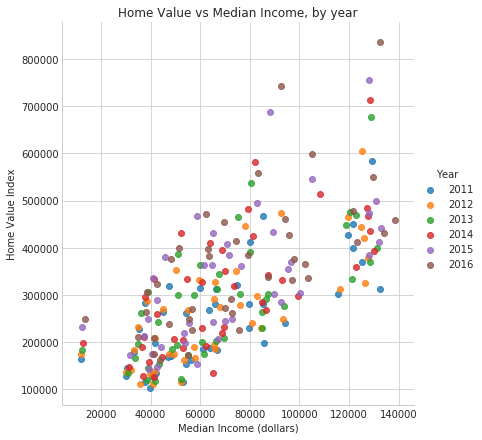

In [58]:
sns.lmplot(x="Median Income (dollars)", y="Home Value Index",
           data=real_estate_info, fit_reg=False,
           hue='Year',
           legend=True,
           size = 6)
plt.title("Home Value vs Median Income, by year")

Another common assumption that we wanted to analyze was that a neighborhood's income level could be determined by which businesses it contained. For example, if there were more Starbucks in a neighborhood, it was likely to be a more wealthy neighborhood. Whereas, an area in which there were a lot of liquor stores was likely to be a poorer neighborhood. 

In [59]:
ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Starbucks Count", "Median Income (dollars)"])
real_estate_info = real_estate_info.loc[real_estate_info["Month"] == 1]
real_estate_info = real_estate_info.loc[real_estate_info["Year"] == 2016]

Text(0.5,1,'Income vs Number of Starbucks')

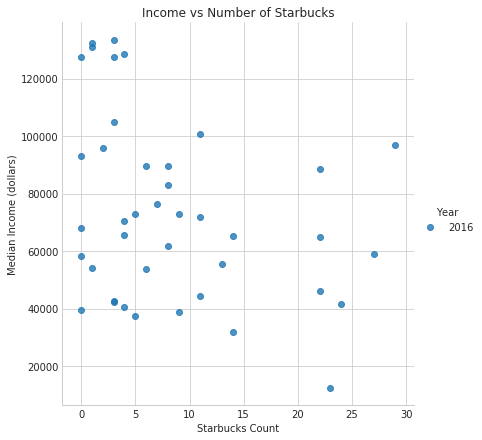

In [60]:
sns.lmplot(x="Starbucks Count", y="Median Income (dollars)", data=real_estate_info, fit_reg=False, hue='Year', legend=True, size = 6)
plt.title("Income vs Number of Starbucks")

In [61]:
ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Liquor Store Count", "Median Income (dollars)"])
real_estate_info = real_estate_info.loc[real_estate_info["Month"] == 1]
real_estate_info = real_estate_info.loc[real_estate_info["Year"] == 2016]

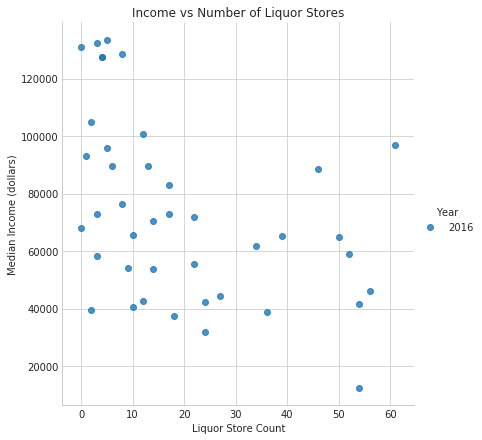

In [62]:
sns.lmplot(x="Liquor Store Count",
           y="Median Income (dollars)",
           data=real_estate_info,
           fit_reg=False,
           hue='Year',
           legend=True,
           size = 6)
_ = plt.title("Income vs Number of Liquor Stores")

However, based on the Austin area, both hypotheses seem to have been disproven as there appears to be little or no correlation between income and the number of these types of businesses in a given zip code. 

Another element of the housing market that we wanted to investigate was the effect of new construction on the prices in a zip code. To start this analysis, we wanted to look at general trends in the amount of construction over time. 

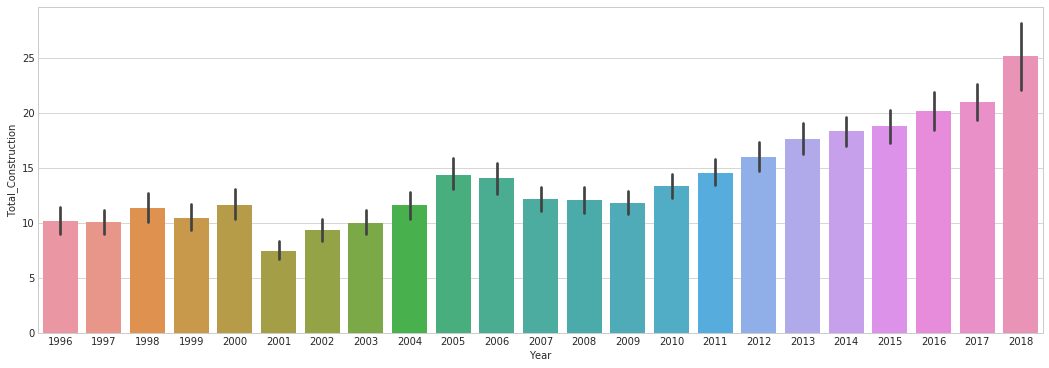

In [63]:
ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
real_estate_info = pd.read_csv(ffname)
real_estate_info = real_estate_info.dropna(subset=["Total_NewConstructions", "Total_RemodelsRepairs"])

real_estate_info["Total_Construction"] = real_estate_info["Total_NewConstructions"] + real_estate_info["Total_RemodelsRepairs"]

fig, ax = plt.subplots(figsize=(18, 6))
_ =sns.barplot(x="Year", y="Total_Construction", data=real_estate_info, ax=ax)


## Bar Plots: 

In [64]:
import os, sys, inspect
import numpy as np
import matplotlib.pyplot as plt
# add parent dir to system dir
currdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
rootdir = os.path.dirname(currdir)
sys.path.insert(0, rootdir)

from src.plot import bar
import pandas as pd

In [65]:
# Importing file
ffname = os.path.join(rootdir, "data", "int", "realestate_demographics.csv")
# Reading the file
df_data = pd.read_csv(data)


## Home Value and Construction Dynamics
Analyse home value and construction dynamics within 5 most expensive/cheapest Neighborhoods:

In [66]:
bar_plot_2 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "Total_NewConstructions"]]
year_select = 2018
# month_select = 4
plot_2 = bar_plot_2.loc[bar_plot_2["Year"]==year_select]

# Group by zip code and year
bar_plot_g2 = plot_2.groupby(["Year", "Zip Code"])
sort_bar2 = bar_plot_g2.mean().sort_values(["Home Value Index"], ascending=False, inplace=False)
sort_top_5 = sort_bar2.loc[:,["Home Value Index", "Total_NewConstructions"]].head()
home_value = sort_top_5["Home Value Index"]
tot_const = sort_top_5["Total_NewConstructions"]*4 #Because we got the mean of constructions and we need total

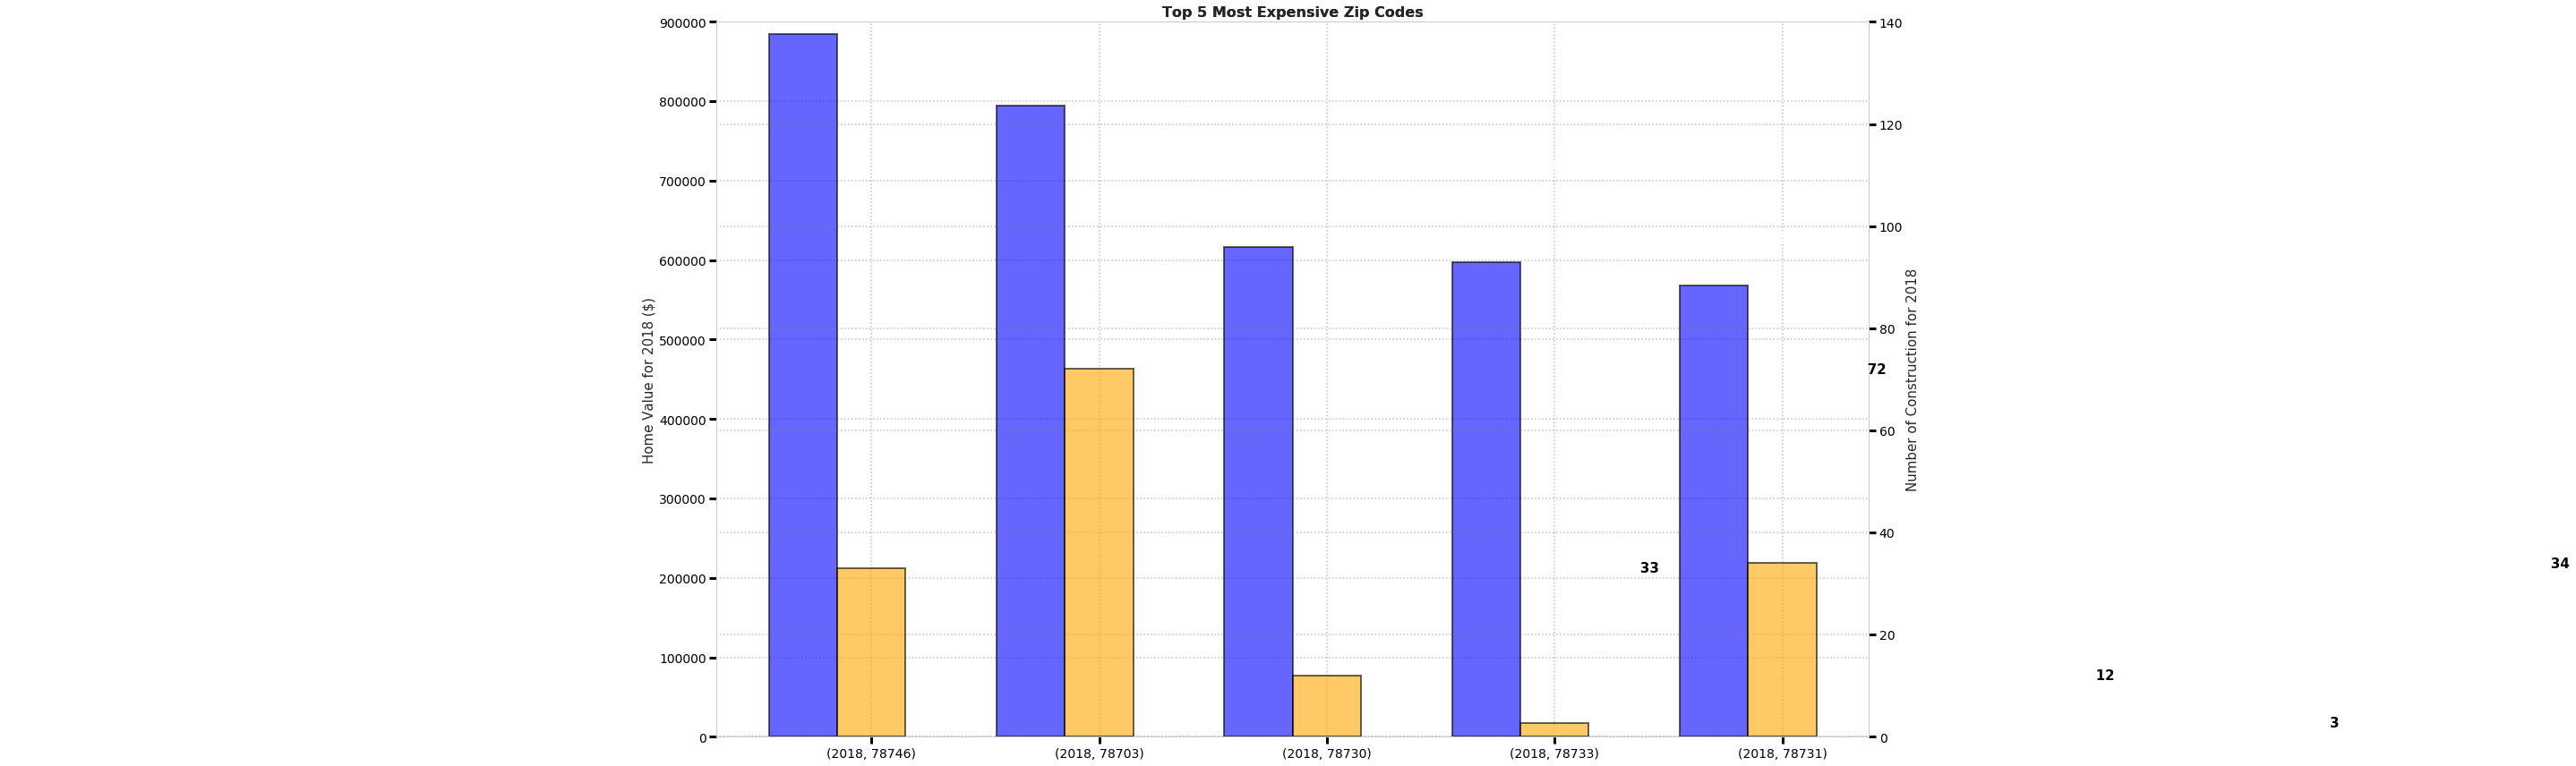

In [67]:
# plot bar charts 
figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5.head().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = tot_const

title = "Top 5 Most Expensive Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"Number of Construction for {year_select}"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)

ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="orange", aligh="center", labelcolor="black")

ax2.set_ylim(0, 140)

plt.savefig("../Reports/Figures/ZHVI_vs_construction-top.png")

In [68]:
sort_bar2 = bar_plot_g2.mean().sort_values(["Home Value Index"], ascending=False, inplace=False)
sort_bot_5 = sort_bar2.loc[:,["Home Value Index", "Total_NewConstructions"]].tail()
home_value = sort_bot_5["Home Value Index"]
tot_const = sort_bot_5["Total_NewConstructions"]*4 #Because we got the mean of constructions

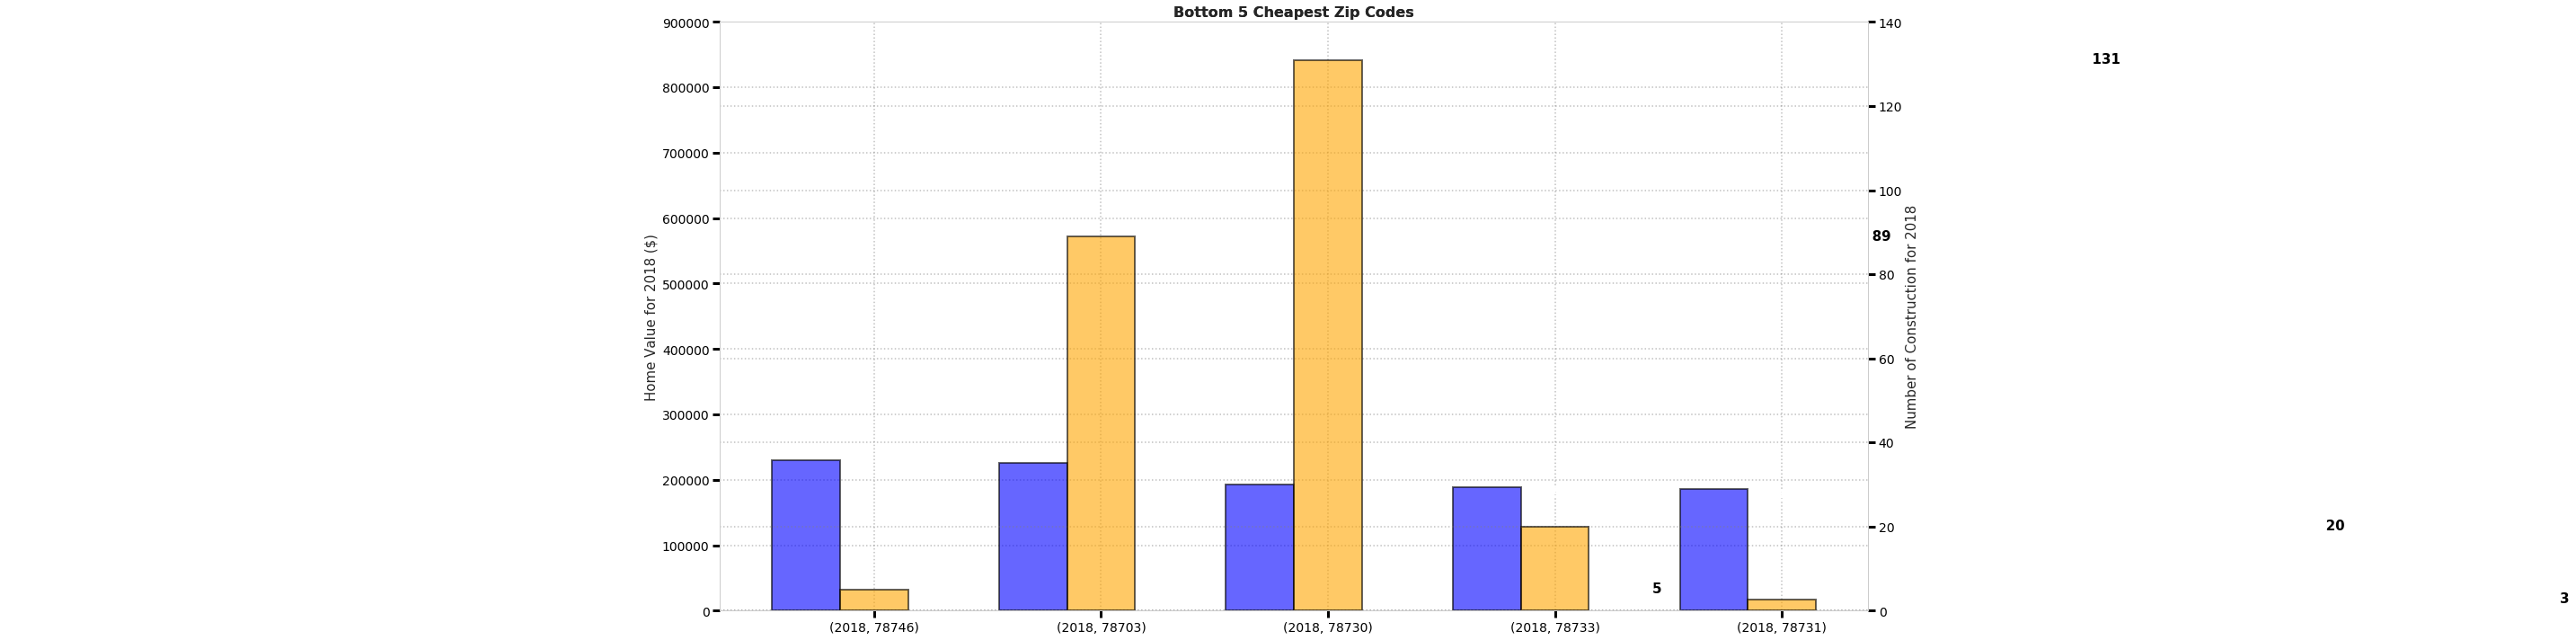

In [69]:
figsize = (20, 10)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5.tail().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = tot_const

title = "Bottom 5 Cheapest Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"Number of Construction for {year_select}"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)

ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ax=ax2, ylabel=ylabel2, title=title, width=width, 
    x=x+width, color="orange", aligh="center", labelcolor="black")

ax2.set_ylim(0, 140)

plt.savefig("../Reports/Figures/ZHVI_vs_construction-bottom.png")

In [70]:
# bar_plot_1 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "Median Income (dollars)"]]
bar_plot_4 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "School Rating(GS)"]]
bar_plot_4.head()

,Zip Code,Year,Month,Home Value Index,School Rating(GS)
0,78701,1996,4,152500.0,1.4
1,78701,1996,5,153600.0,1.4
2,78701,1996,6,154600.0,1.4
3,78701,1996,7,155500.0,1.4
4,78701,1996,8,156300.0,1.4


In [71]:
year_select = 2018
# month_select = 4
plot_4 = bar_plot_4.loc[bar_plot_4["Year"]==year_select]
plot_4.head()

,Zip Code,Year,Month,Home Value Index,School Rating(GS)
261,78701,2018,1,408700.0,1.40
262,78701,2018,2,411800.0,1.40
263,78701,2018,3,417300.0,1.40
264,78701,2018,4,420500.0,1.40
526,78702,2018,1,404700.0,3.08


In [72]:
# Group by zip code and year
bar_plot_g4 = plot_4.groupby(["Year", "Zip Code"])

sort_bar4 = bar_plot_g4.mean().sort_values(["Home Value Index"], ascending=False, inplace=False)
sort_top_5_2 = sort_bar4.loc[:,["Home Value Index", "School Rating(GS)"]].head()
home_value = sort_top_5_2["Home Value Index"]
sch_rating = sort_top_5_2["School Rating(GS)"]
sort_top_5_2

Home Value Index  School Rating(GS)
Year Zip Code                                     
2018 78746             884325.0               4.27
     78703             794575.0               5.22
     78730             616950.0               8.00
     78733             597225.0               6.67
     78731             567950.0               2.78

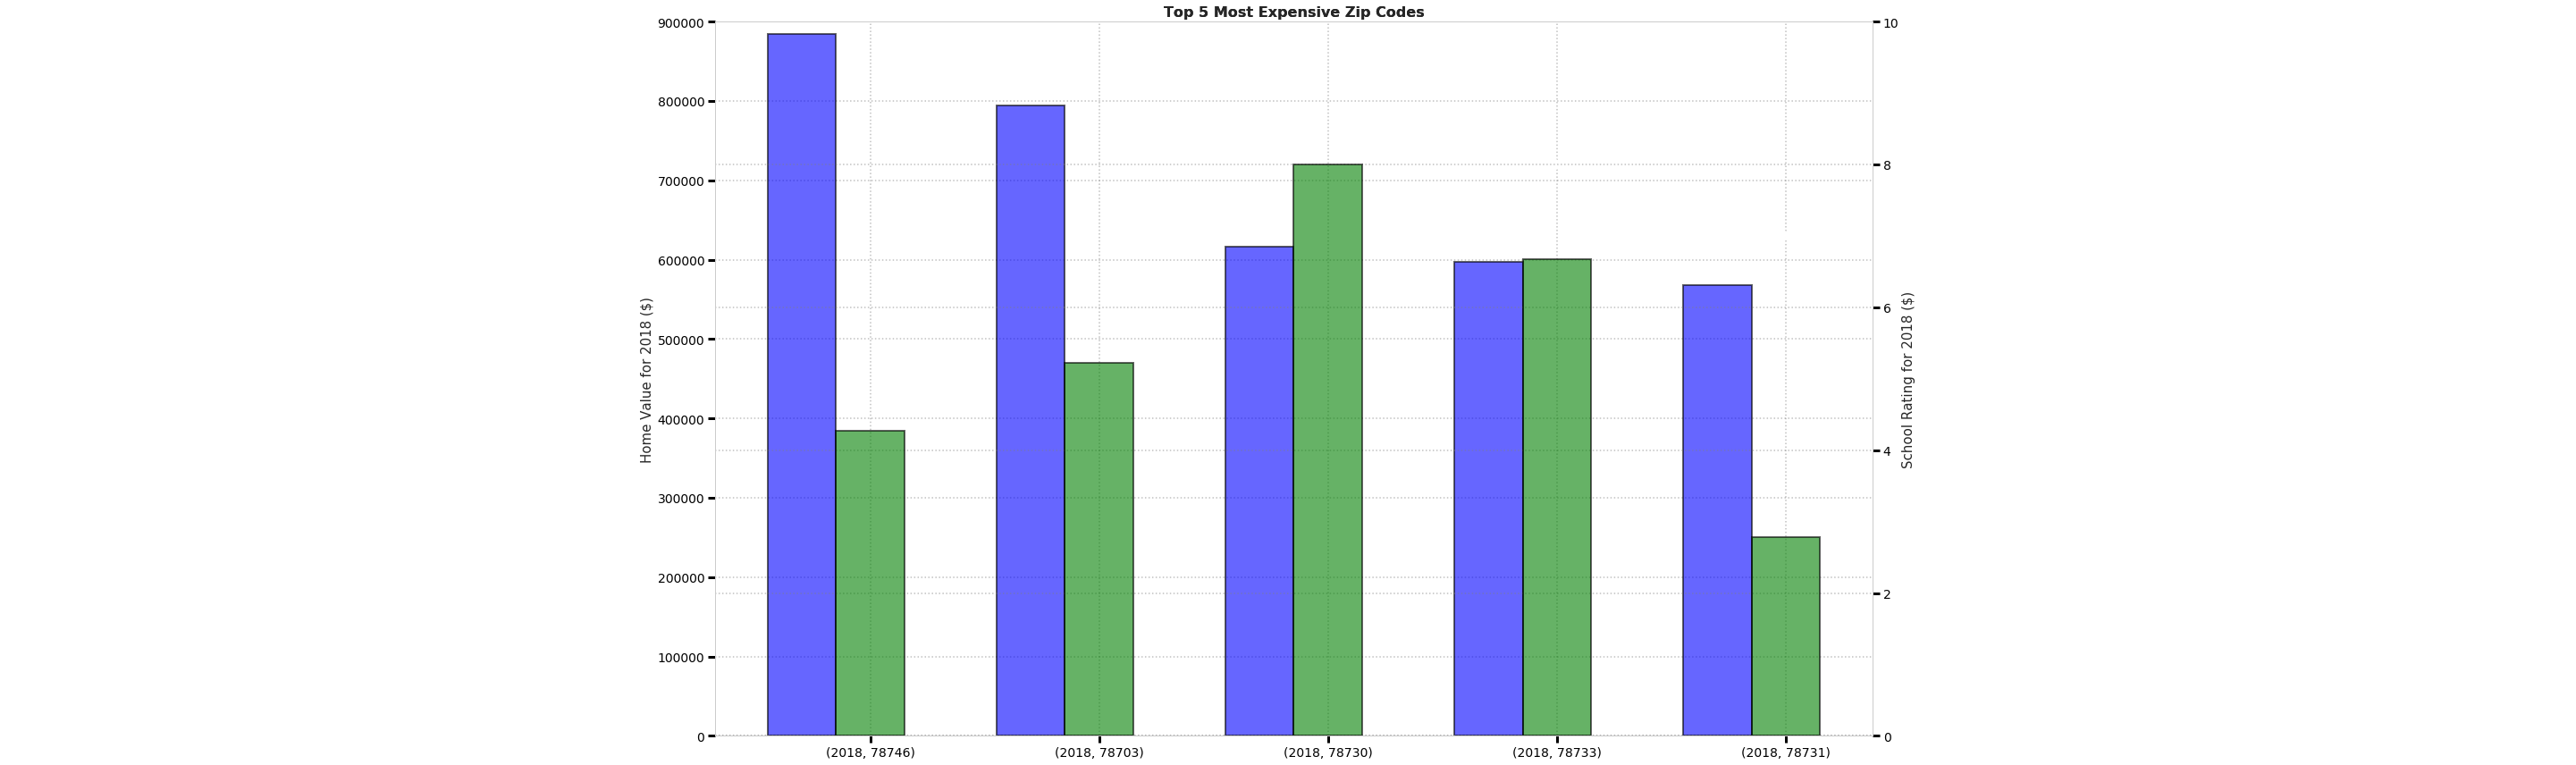

In [73]:
figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5_2.head().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = sch_rating

title = "Top 5 Most Expensive Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"School Rating for {year_select} ($)"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)
ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="green")
ax2.set_ylim(0, 10)

plt.savefig("../Reports/Figures/ZHVI_vs_SchoolRaitings-top.png")

In [74]:
sort_bot_5_2 = sort_bar4.loc[:,["Home Value Index", "School Rating(GS)"]].tail()
home_value = sort_bot_5_2["Home Value Index"]
sch_rating = sort_bot_5_2["School Rating(GS)"]
sort_bot_5_2

Home Value Index  School Rating(GS)
Year Zip Code                                     
2018 78753             230275.0               3.50
     78741             225250.0               4.33
     78744             193000.0               3.45
     78724             188175.0               3.94
     78725             185700.0               3.00

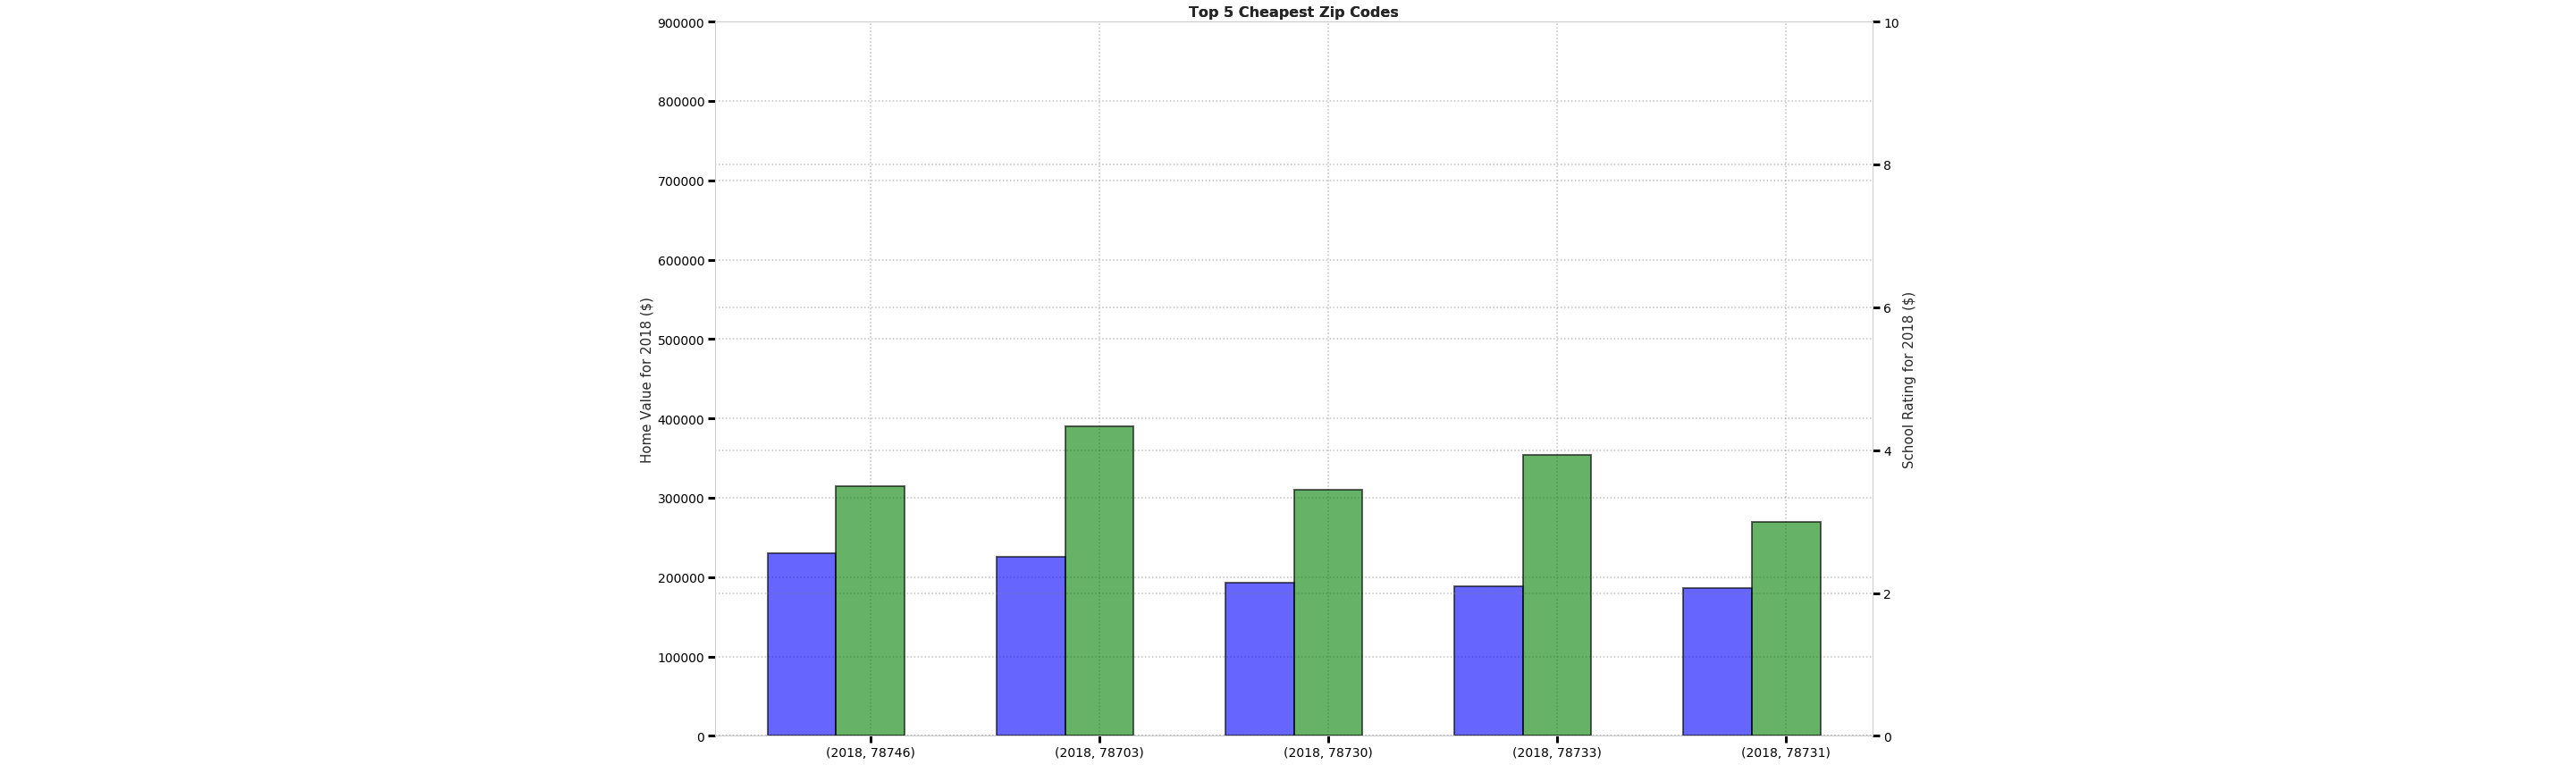

In [75]:
figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5_2.tail().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = sch_rating

title = "Top 5 Cheapest Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"School Rating for {year_select} ($)"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)

ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="green")
ax2.set_ylim(0, 10)

plt.savefig("../Reports/Figures/ZHVI_vs_SchoolRaitings-bottom.png")

In [76]:
# bar_plot_1 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "Median Income (dollars)"]]
bar_plot_5 = df_data[["Zip Code", "Year", "Month", "Home Value Index", "Median Income (dollars)"]]
bar_plot_5.head()

,Zip Code,Year,Month,Home Value Index,Median Income (dollars)
0,78701,1996,4,152500.0,NaN
1,78701,1996,5,153600.0,NaN
2,78701,1996,6,154600.0,NaN
3,78701,1996,7,155500.0,NaN
4,78701,1996,8,156300.0,NaN


In [77]:
year_select = 2016
month_select = 1
plot_5 = bar_plot_5.loc[bar_plot_5["Year"]==year_select]
plot_5.head()

,Zip Code,Year,Month,Home Value Index,Median Income (dollars)
237,78701,2016,1,372800.0,96926.416667
238,78701,2016,2,375900.0,97397.833333
239,78701,2016,3,375300.0,97869.250000
240,78701,2016,4,369600.0,98340.666667
241,78701,2016,5,366400.0,98812.083333


In [78]:
# Group by zip code and year
bar_plot_g5 = plot_5.groupby(["Year", "Zip Code"])

sort_bar5 = bar_plot_g5.mean().sort_values(["Home Value Index"], ascending=False, inplace=False)
sort_top_5_3 = sort_bar5.loc[:,["Home Value Index", "Median Income (dollars)"]].head()
home_value = sort_top_5_3["Home Value Index"]
med_inc = sort_top_5_3["Median Income (dollars)"]
sort_top_5_3

Home Value Index  Median Income (dollars)
Year Zip Code                                           
2016 78746        798033.333333            130549.458333
     78703        723183.333333             90645.458333
     78730        589300.000000            105056.666667
     78731        534508.333333             83187.750000
     78733        522708.333333            130374.125000

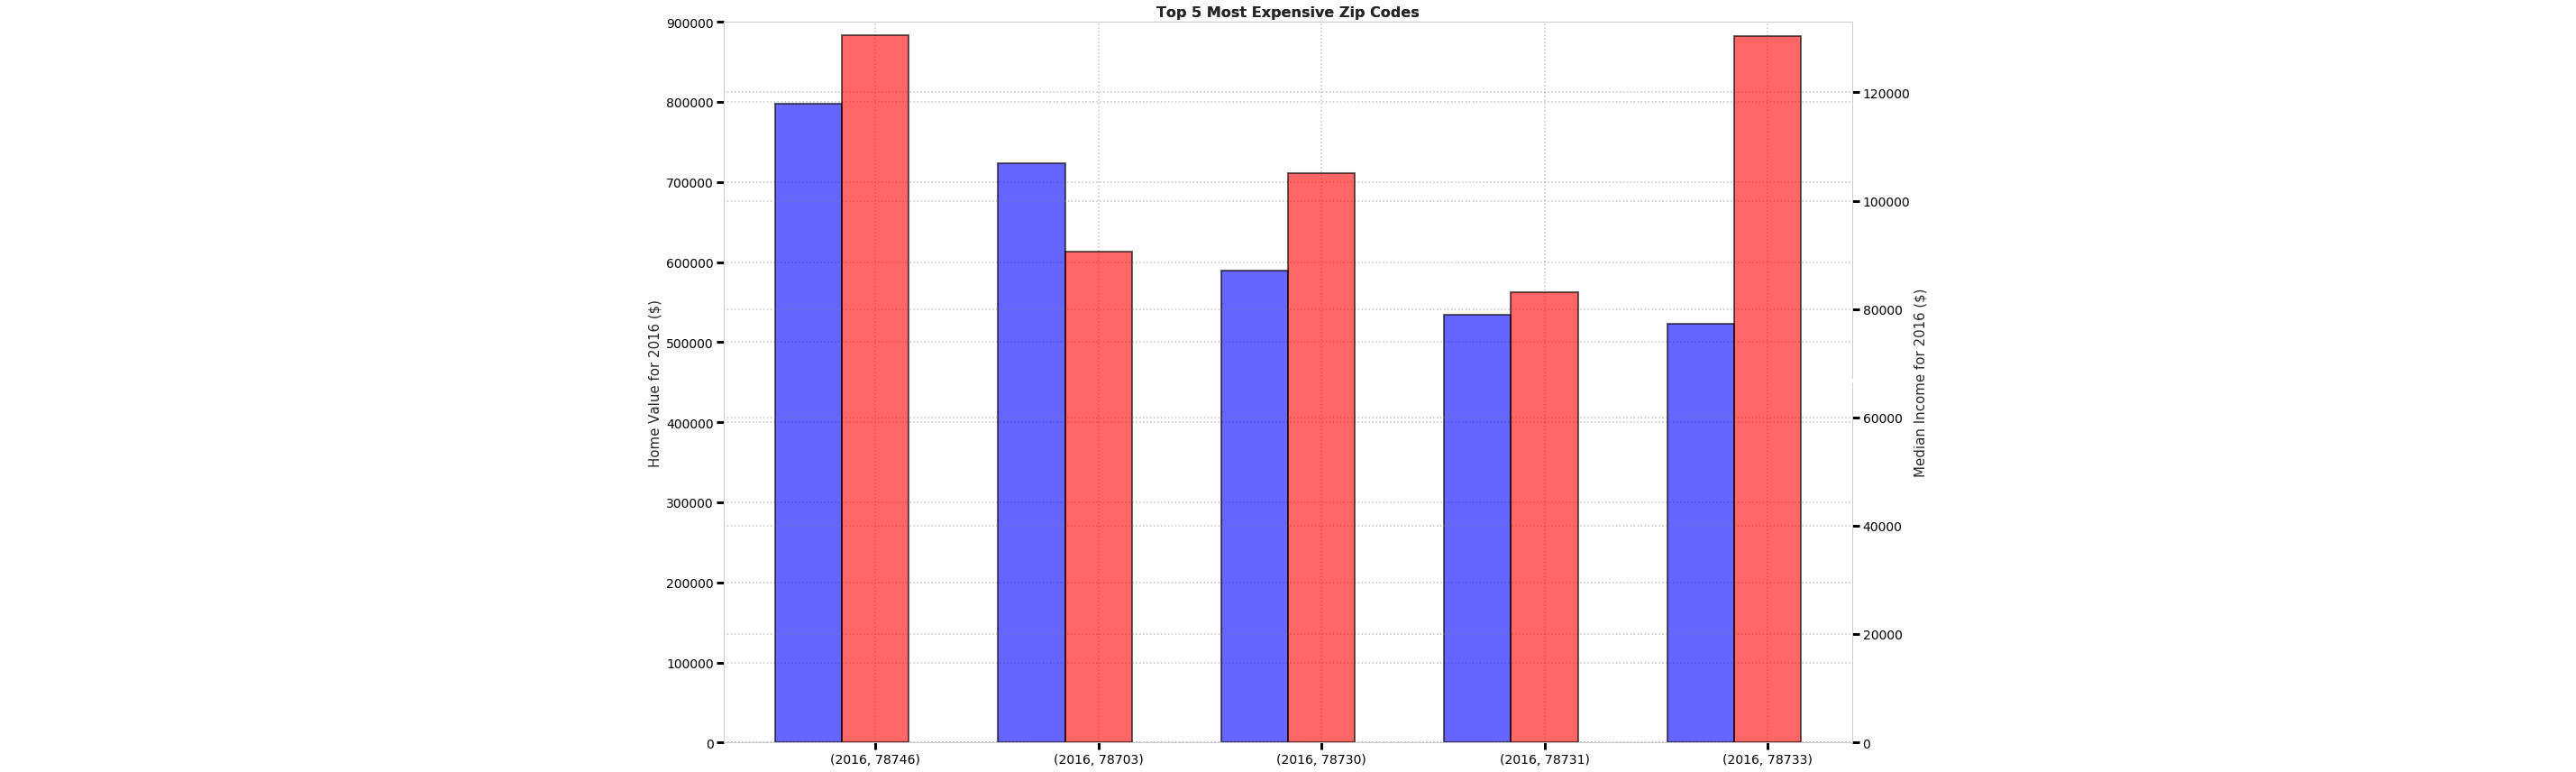

In [79]:
figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5_3.head().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = med_inc

title = "Top 5 Most Expensive Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"Median Income for {year_select} ($)"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)
ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="red")
ax2.set_ylim(0, 133000)

plt.savefig("../Reports/Figures/ZHVI_vs_HouseholdIncome-top.png")

In [80]:
sort_top_5_3 = sort_bar5.loc[:,["Home Value Index", "Median Income (dollars)"]].tail()
home_value = sort_top_5_3["Home Value Index"]
med_inc = sort_top_5_3["Median Income (dollars)"]
sort_top_5_3

Home Value Index  Median Income (dollars)
Year Zip Code                                           
2016 78741        197958.333333             33440.708333
     78753        193175.000000             40978.875000
     78725        165025.000000             56763.500000
     78724        162425.000000             40410.583333
     78744        157383.333333             43215.125000

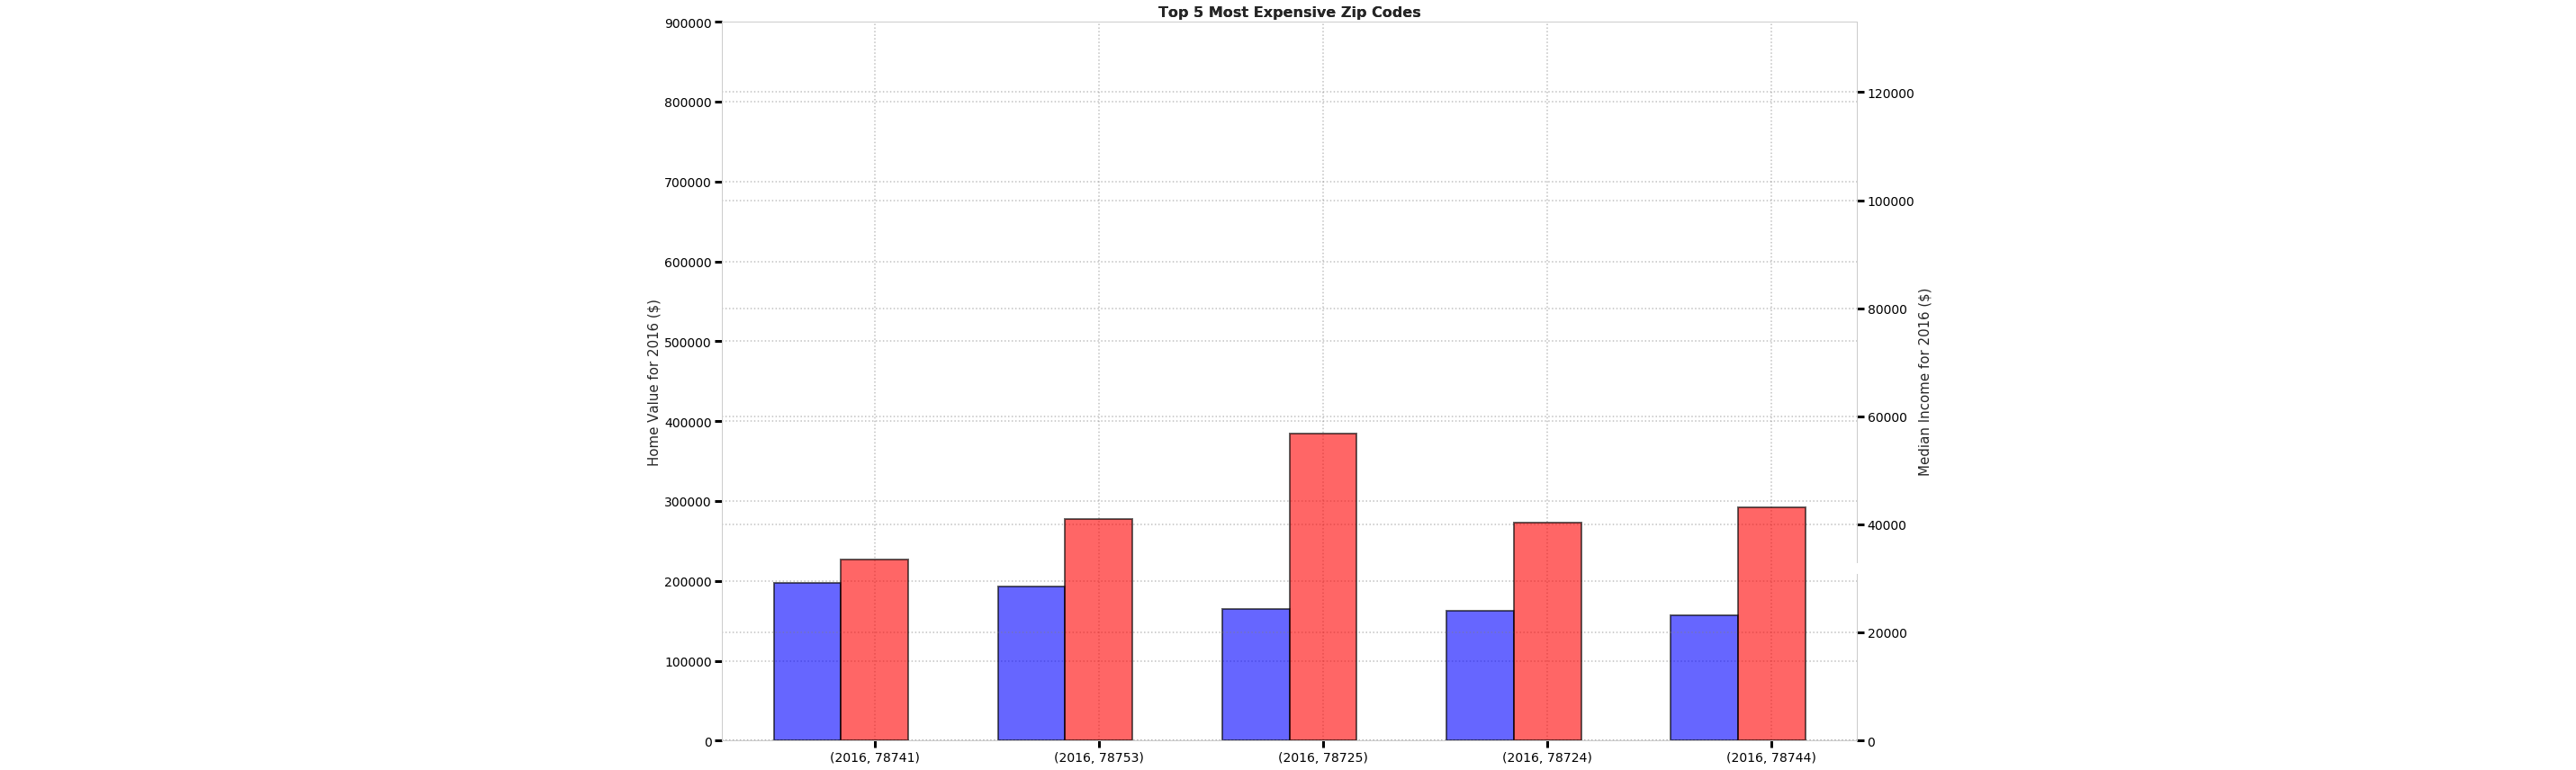

In [81]:
figsize = (20, 12)
fig = plt.figure(figsize=figsize)
ax1 = fig.subplots(1, 1)

# labels = bar_plot_g2.mean().head().index.values
labels = sort_top_5_3.head().index.values
x = np.arange(len(labels))
width = 0.3
height = home_value
height2 = med_inc

title = "Top 5 Most Expensive Zip Codes"
ylabel = f"Home Value for {year_select} ($)"
ylabel2 = f"Median Income for {year_select} ($)"

plt.ylim(0,900000)

bar(height, ticklabels=labels,
    ylabel=ylabel,
    ax=ax1, title=title, width=width, 
    x=x)
ax2 = ax1.twinx()
# ax2.text(labels, height2, s="{:2.0f}".format(height2), horizontalalignment="center")
bar(height2, ticklabels=labels,
    ylabel=ylabel2,
    ax=ax2, title=title, width=width, 
    x=x+width, color="red")
ax2.set_ylim(0, 133000)

plt.savefig("../Reports/Figures/ZHVI_vs_HouseholdIncome-bottom.png")


## House Price Prediction